In [1]:
import pandas as pd
df = pd.read_csv("Final_Data.csv")
df.head()

,Placed In,Class 10 Percentage,Class 12 Percentage,Degree Percentage,Degree CGPA,Live Backlogs,Education Gap,Year down,Internship Details
0,1,59,53,70,8,0,0,1,1
1,1,86,73,67,7,0,0,0,1
2,1,83,73,77,8,0,0,0,1
3,1,93,84,85,9,0,1,0,1
4,0,82,73,78,9,0,0,0,1


In [2]:
df.columns

Index(['Placed In', 'Class 10 Percentage', 'Class 12 Percentage',
       'Degree Percentage', 'Degree CGPA', 'Live Backlogs', 'Education Gap',
       'Year down', 'Internship Details'],
      dtype='object')

In [3]:
#split to x and y
X = df[['Class 10 Percentage', 'Class 12 Percentage',
       'Degree Percentage', 'Degree CGPA', 'Live Backlogs', 'Education Gap',
       'Year down', 'Internship Details']]
Y = df['Placed In']

In [4]:
X 

,Class 10 Percentage,Class 12 Percentage,Degree Percentage,Degree CGPA,Live Backlogs,Education Gap,Year down,Internship Details
0,59,53,70,8,0,0,1,1
1,86,73,67,7,0,0,0,1
2,83,73,77,8,0,0,0,1
3,93,84,85,9,0,1,0,1
4,82,73,78,9,0,0,0,1
...,...,...,...,...,...,...,...,...
851,83,61,77,8,0,0,0,1
852,80,60,60,7,0,1,0,1
853,84,70,67,7,0,0,0,1
854,87,66,58,7,0,1,1,1


In [5]:
df = df.reset_index(drop=True)
df.head()

,Placed In,Class 10 Percentage,Class 12 Percentage,Degree Percentage,Degree CGPA,Live Backlogs,Education Gap,Year down,Internship Details
0,1,59,53,70,8,0,0,1,1
1,1,86,73,67,7,0,0,0,1
2,1,83,73,77,8,0,0,0,1
3,1,93,84,85,9,0,1,0,1
4,0,82,73,78,9,0,0,0,1


In [6]:
#feature Importance 
from sklearn.ensemble import ExtraTreesRegressor
model =  ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [7]:
print(model.feature_importances_)

[0.30731949 0.25417529 0.26961536 0.06749299 0.00948346 0.03237293
 0.04064868 0.01889181]


<AxesSubplot:>

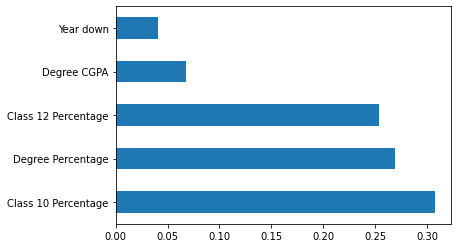

In [8]:
#Visual version of above
import matplotlib.pyplot as plt
%matplotlib inline 
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_imp.nlargest(5).plot(kind='barh')

In [9]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [10]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

In [12]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [14]:
y_pred = clf.predict(x_test)

In [15]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7325581395348837


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train, y_train)

SVC(random_state=0)

In [18]:
y_pred = classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7209302325581395


In [20]:
clf1 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
clf1.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [21]:
y_pred = clf1.predict(x_test)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7325581395348837


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[ 11  41]
 [  5 115]]


0.7325581395348837

In [24]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [26]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.72


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
hyperparameters = {'max_depth': [2, 4, 6, 8],
                   'min_samples_leaf': [1, 2, 4],
                   'criterion': ['gini', 'entropy']}

In [29]:
model = DecisionTreeClassifier()

# Create an instance of the GridSearchCV object
grid_search = GridSearchCV(model, hyperparameters, cv=5, scoring='accuracy')

In [30]:
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1}


In [32]:
model = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_leaf=1 )
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [33]:
accuracy = model.score(x_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.7093023255813954


# Flask 

In [ ]:
from flask import Flask, jsonify, request
import joblib

# Initialize Flask app
app = Flask(__name__)

# Load trained model
model = joblib.load('path/to/trained/model.pkl')

# Define API endpoint for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Get data from request
    data = request.json

    # Make prediction using loaded model
    prediction = model.predict(data)

    # Return prediction as JSON
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    # Run app
    app.run(debug=True)


In [35]:
data = [[80, 70, 80, 8, 0,0,0,1]]
new_df = pd.DataFrame(data, columns=['Class 10 Percentage', 'Class 12 Percentage', 'Degree Percentage',
       'Degree CGPA', 'Live Backlogs', 'Education Gap', 'Year down',
       'Internship Details'])
new_df

,Class 10 Percentage,Class 12 Percentage,Degree Percentage,Degree CGPA,Live Backlogs,Education Gap,Year down,Internship Details
0,80,70,80,8,0,0,0,1


In [34]:
X.columns

Index(['Class 10 Percentage', 'Class 12 Percentage', 'Degree Percentage',
       'Degree CGPA', 'Live Backlogs', 'Education Gap', 'Year down',
       'Internship Details'],
      dtype='object')

In [36]:
single = clf.predict(new_df)
print(single)

[1]


C:\Users\Rohit Bhapkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


# Pickle

In [37]:
import pickle
# open a file, where you ant to store the data
filename = "model.sav"

pickle.dump(clf, open(filename, "wb"))